In [2]:
import numpy as np
import matplotlib.pylab as plt

from scipy import interpolate

from matplotlib import ticker, cm
import matplotlib as mpl
import sys
from matplotlib.lines import Line2D
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.colors as colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from os import chdir as cd

#sys.path.insert(0,"/sakura/ptmp/aubet/Simplification/GR1D_runs/")

In [3]:
!ls *SFHo*1D.dat 
!pwd


FLASH_Gang_ref_SFHo_1D.dat   FLASH_Hann_ref_SFHo_1D.dat
FLASH_Gang_simp_SFHo_1D.dat  FLASH_Hann_simp_SFHo_1D.dat
/data/home/abetranhandy/Analysis


In [4]:
list_file = !ls *SFHo*1D.dat
!head -1 s20_ref_SFHo_nb7.dat

head: cannot open 's20_ref_SFHo_nb7.dat' for reading: No such file or directory


In [5]:
list_file = !ls *SFHo*1D.dat
#list_file = !ls -I '*SFHo*' *1D.dat

for i in list_file:
    globals()[i[:-4]] = np.loadtxt(i,unpack=True,usecols=(0,11,16,17,29,33,34,35,36,37,38,18,13,10,17))
    
    

source_GR1D="GR1D_runs/"

list_GR1D=!cd $source_GR1D && ls -d *SFHo*




for i in list_GR1D:
    globals()[i+"_shock"] = np.loadtxt(source_GR1D+i+"/"+"shock_radius_t.dat",unpack=True)
    globals()[i+"_PNS"] =np.loadtxt(source_GR1D+i+"/"+"r_rho1e11.dat",unpack=True)
    globals()[i+"_lum"] =np.loadtxt(source_GR1D+i+"/"+"M1_flux_lum.dat",unpack=True)
    globals()[i+"_energ"] =np.loadtxt(source_GR1D+i+"/"+"M1_flux_aveenergy_lab.dat",unpack=True)
    



GR1D_shock = dict(filter(lambda item: "SFHo" in item[0] and   "s20" in item[0] and "shock" in item[0], globals().items()))
GR1D_PNS = dict(filter(lambda item: "SFHo" in item[0] and   "s20" in item[0] and "PNS" in item[0], globals().items()))
GR1D_lum = dict(filter(lambda item: "SFHo" in item[0] and   "s20" in item[0] and "lum" in item[0], globals().items()))
GR1D_energ = dict(filter(lambda item: "SFHo" in item[0] and   "s20" in item[0] and "energ" in item[0], globals().items()))

 
print(list(GR1D_shock.keys()))

['s20_full_Gang_SFHo_final_shock', 's20_full_SFHo_shock', 's20_Gang_ref_SFHo_shock', 's20_Gang_simp_SFHo_shock', 's20_Hann_ref_SFHo_shock', 's20_Hann_simp_SFHo_shock']


In [6]:

list_file = !ls FLASH*.dat | grep -v "SFH" #!ls --ignore "*SFHo*" FLASH*.dat

print(list_file)


for i in list_file:
    globals()[i[:-4]] = np.loadtxt(i,unpack=True,usecols=(0,11,16,17,29,33,34,35,36,37,38,18,13,10,17))

    source_GR1D="GR1D_runs/"

list_GR1D=!cd $source_GR1D && ls -d *SRO*

print(list_GR1D)
    
for i in list_GR1D:
    globals()[i+"_shock"] = np.loadtxt(source_GR1D+i+"/"+"shock_radius_t.dat",unpack=True)
    globals()[i+"_PNS"] =np.loadtxt(source_GR1D+i+"/"+"r_rho1e11.dat",unpack=True)
    globals()[i+"_lum"] =np.loadtxt(source_GR1D+i+"/"+"M1_flux_lum.dat",unpack=True)
    globals()[i+"_energ"] =np.loadtxt(source_GR1D+i+"/"+"M1_flux_aveenergy_lab.dat",unpack=True)
    

    
GR1D_shock = dict(filter(lambda item: "SRO" in item[0] and   "s20" in item[0] and "shock" in item[0], globals().items()))
GR1D_PNS = dict(filter(lambda item: "SRO" in item[0] and   "s20" in item[0] and "PNS" in item[0], globals().items()))
GR1D_lum = dict(filter(lambda item: "SRO" in item[0] and   "s20" in item[0] and "lum" in item[0], globals().items()))
GR1D_energ = dict(filter(lambda item: "SRO" in item[0] and   "s20" in item[0] and "energ" in item[0], globals().items()))

 
print(list(GR1D_shock.keys()))

['FLASH_Gang_ref_1D.dat', 'FLASH_Gang_simp_1D.dat', 'FLASH_Hann_ref_1D.dat', 'FLASH_Hann_simp_1D.dat']
['s20_full_Gang_SRO_final', 's20_Hann_SRO_full', 's20_Hann_SRO_ref', 's20_ref_SRO_Gang', 's20_simp_Gang_SRO_final', 's20_simp_Hann_SRO_final']
['s20_full_Gang_SRO_final_shock', 's20_Hann_SRO_full_shock', 's20_Hann_SRO_ref_shock', 's20_ref_SRO_Gang_shock', 's20_simp_Gang_SRO_final_shock', 's20_simp_Hann_SRO_final_shock']


In [7]:

list_file = !ls FLASH*.dat     # | grep -v "SFH" #!ls --ignore "*SFHo*" FLASH*.dat

print(list_file)


for i in list_file:
    globals()[i[:-4]] = np.loadtxt(i,unpack=True,usecols=(0,11,16,17,29,33,34,35,36,37,38,18,13,10,17))

    source_GR1D="GR1D_runs/"

list_GR1D=!cd $source_GR1D && ls       # && ls -d # *SRO*

print(list_GR1D)
    
for i in list_GR1D:
    globals()[i+"_shock"] = np.loadtxt(source_GR1D+i+"/"+"shock_radius_t.dat",unpack=True)
    globals()[i+"_PNS"] =np.loadtxt(source_GR1D+i+"/"+"r_rho1e11.dat",unpack=True)
    globals()[i+"_lum"] =np.loadtxt(source_GR1D+i+"/"+"M1_flux_lum.dat",unpack=True)
    globals()[i+"_energ"] =np.loadtxt(source_GR1D+i+"/"+"M1_flux_aveenergy_lab.dat",unpack=True)
    

    
GR1D_shock = dict(filter(lambda item:  "s20" in item[0] and "shock" in item[0], globals().items()))
GR1D_PNS = dict(filter(lambda item: "s20" in item[0] and "PNS" in item[0], globals().items()))
GR1D_lum = dict(filter(lambda item: "s20" in item[0] and "lum" in item[0], globals().items()))
GR1D_energ = dict(filter(lambda item: "s20" in item[0] and "energ" in item[0], globals().items()))

 
print(list(GR1D_shock.keys()))

['FLASH_Gang_ref_1D.dat', 'FLASH_Gang_ref_SFHo_1D.dat', 'FLASH_Gang_simp_1D.dat', 'FLASH_Gang_simp_SFHo_1D.dat', 'FLASH_Hann_ref_1D.dat', 'FLASH_Hann_ref_SFHo_1D.dat', 'FLASH_Hann_simp_1D.dat', 'FLASH_Hann_simp_SFHo_1D.dat']
['s20_full_Gang_SFHo_final', 's20_full_Gang_SRO_final', 's20_full_SFHo', 's20_Gang_ref_SFHo', 's20_Gang_simp_SFHo', 's20_Hann_ref_SFHo', 's20_Hann_simp_SFHo', 's20_Hann_SRO_full', 's20_Hann_SRO_ref', 's20_ref_SRO_Gang', 's20_simp_Gang_SRO_final', 's20_simp_Hann_SRO_final']
['s20_full_Gang_SFHo_final_shock', 's20_full_SFHo_shock', 's20_Gang_ref_SFHo_shock', 's20_Gang_simp_SFHo_shock', 's20_Hann_ref_SFHo_shock', 's20_Hann_simp_SFHo_shock', 's20_full_Gang_SRO_final_shock', 's20_Hann_SRO_full_shock', 's20_Hann_SRO_ref_shock', 's20_ref_SRO_Gang_shock', 's20_simp_Gang_SRO_final_shock', 's20_simp_Hann_SRO_final_shock']


In [8]:


#col_GR1D={'s20_full_SFHo_shock':'orange',\
#          's20_Gang_ref_SFHo_shock':'orange', 's20_Gang_simp_SFHo_shock':'--',color='orange', 's20_Hann_ref_SFHo_shock':'r',\
#          's20_Hann_simp_SFHo_shock':'--r','s20_full_Gang_SFHo_final_shock':':c'}


for i in list_file:
    print(i)
    if 'ref' in i: 
        globals()['ticks'+i[:-4]]='-'
    else :    
        globals()['ticks'+i[:-4]]='--'
    if ('Gang' in i) & ('SFHo' in i) : 
        globals()['color'+i[:-4]]='orange'
        globals()['tb'+i[:-4]]=0.300
    elif 'SFHo' in i :
        globals()['color'+i[:-4]]='r'
        globals()['tb'+i[:-4]]=0.300
    elif ('Gang' in i): 
        globals()['color'+i[:-4]]='g'
        globals()['tb'+i[:-4]]=0.319
    else:
        globals()['color'+i[:-4]]='b'
        globals()['tb'+i[:-4]]=0.319

        

for i in GR1D_shock.keys():
    print(i)
    if 'ref' in i: 
        globals()['ticks'+i]='-'    
    elif 'full' in i: 
        globals()['ticks'+i]=':'
    else :    
        globals()['ticks'+i]='--'
    if ('Gang' in i) & ('SFHo' in i) : 
        globals()['color'+i]='orange'
        globals()['tb'+i]=0.300
    elif 'SFHo' in i :
        globals()['color'+i]='r'
        globals()['tb'+i]=0.300
    elif ('Gang' in i) & ('SRO' in i) : 
        globals()['color'+i]='g'
        globals()['tb'+i]=0.319
    elif 'SRO' in i :
        globals()['color'+i]='b'
        globals()['tb'+i]=0.319
    else:
        print("case not found")

        


FLASH_Gang_ref_1D.dat
FLASH_Gang_ref_SFHo_1D.dat
FLASH_Gang_simp_1D.dat
FLASH_Gang_simp_SFHo_1D.dat
FLASH_Hann_ref_1D.dat
FLASH_Hann_ref_SFHo_1D.dat
FLASH_Hann_simp_1D.dat
FLASH_Hann_simp_SFHo_1D.dat
s20_full_Gang_SFHo_final_shock
s20_full_SFHo_shock
s20_Gang_ref_SFHo_shock
s20_Gang_simp_SFHo_shock
s20_Hann_ref_SFHo_shock
s20_Hann_simp_SFHo_shock
s20_full_Gang_SRO_final_shock
s20_Hann_SRO_full_shock
s20_Hann_SRO_ref_shock
s20_ref_SRO_Gang_shock
s20_simp_Gang_SRO_final_shock
s20_simp_Hann_SRO_final_shock


s20_full_Gang_SFHo_final_shock
s20_full_SFHo_shock
s20_Gang_ref_SFHo_shock
s20_Gang_simp_SFHo_shock
s20_Hann_ref_SFHo_shock
s20_Hann_simp_SFHo_shock
s20_full_Gang_SRO_final_shock
s20_Hann_SRO_full_shock
s20_Hann_SRO_ref_shock
s20_ref_SRO_Gang_shock
s20_simp_Gang_SRO_final_shock
s20_simp_Hann_SRO_final_shock
FLASH_Gang_ref_1D
FLASH_Gang_ref_SFHo_1D
FLASH_Gang_simp_1D
FLASH_Gang_simp_SFHo_1D
FLASH_Hann_ref_1D
FLASH_Hann_ref_SFHo_1D
FLASH_Hann_simp_1D
FLASH_Hann_simp_SFHo_1D
1
0
1
0


[Text(0.0, 0, ''),
 Text(0.2, 0, ''),
 Text(0.4, 0, ''),
 Text(0.6000000000000001, 0, '')]

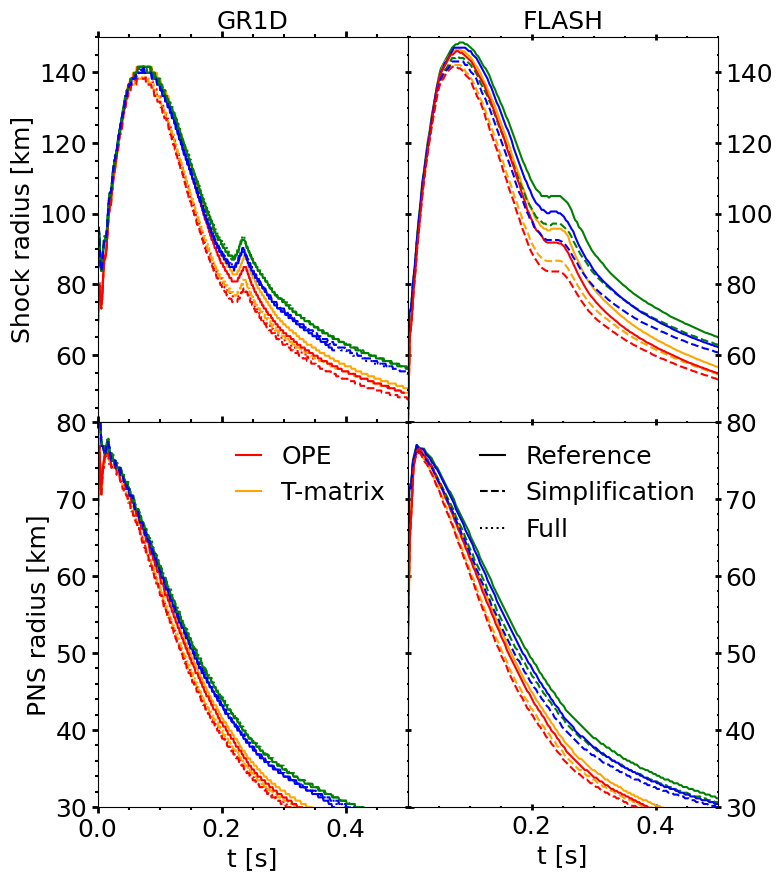

In [9]:
tbounce_SRO=0.299


col=['orange','orange','r','r']
#col_GR1D=['orange','orange','r','r',"r","orange"]
ticks=['-','--','-','--']
ticks_GR1D=['-','--',":",'-','--',':']

factor=1e-5

fig,ax = plt.subplots(2,2,figsize=(8,10))
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]


for i in range(len(GR1D_shock.keys())):
    print(list(GR1D_shock.keys())[i])
    name=list(GR1D_shock.keys())[i]
    tau=GR1D_shock[list(GR1D_shock.keys())[i]][1]
    x=GR1D_shock[list(GR1D_shock.keys())[i]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(GR1D_shock[list(GR1D_shock.keys())[i]][0].min(),GR1D_shock[list(GR1D_shock.keys())[i]][0].max(),500)
    tau_new= f(time)
    ax1.plot(time-globals()['tb'+name],tau_new*factor,ls=globals()['ticks'+name],color=globals()['color'+name])
    
    tau=GR1D_PNS[list(GR1D_PNS.keys())[i]][1]
    x=GR1D_PNS[list(GR1D_PNS.keys())[i]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(GR1D_PNS[list(GR1D_PNS.keys())[i]][0].min(),GR1D_PNS[list(GR1D_PNS.keys())[i]][0].max(),500)
    tau_new= f(time)
    ax3.plot(time-globals()['tb'+name],tau_new*factor,ls=globals()['ticks'+name],color=globals()['color'+name])



for i in range(len(list_file)):
    name=list_file[i][:-4]
    print(name)
    tau=globals()[list_file[i][:-4]][1]
    x=globals()[list_file[i][:-4]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(globals()[list_file[i][:-4]][0].min(),globals()[list_file[i][:-4]][0].max(),500)
    tau_new= f(time)
    ax2.plot(time-globals()['tb'+name],tau_new*factor,ls=globals()['ticks'+name],color=globals()['color'+name])

    tau=globals()[list_file[i][:-4]][4]
    x=globals()[list_file[i][:-4]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(globals()[list_file[i][:-4]][0].min(),globals()[list_file[i][:-4]][0].max(),500)
    tau_new= f(time)
    ax4.plot(time-globals()['tb'+name],tau_new*factor,ls=globals()['ticks'+name],color=globals()['color'+name])




black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
ax3.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=18,handlelength=1,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
black_line3, = plt.plot([], [], color='k', linestyle=':')
ax4.legend([black_line1,black_line2,black_line3],[r"Reference",r"Simplification","Full"],fontsize=18,handlelength=1,frameon=False,loc= "upper right")


ax1.set_xlim([0,0.5])
ax2.set_xlim([0.00001,0.5])
ax3.set_xlim([0,0.5])
ax4.set_xlim([0.00001,0.5])

ax1.set_ylim([41,150])
ax3.set_ylim([30,80])
ax2.set_ylim([41,150])
ax4.set_ylim([30,80])




for i in range(4) : 
    i=i+1
    print(i%2)
    if (i%2 == 1):
        test=globals()['ax'+str(i)]
        test.xaxis.set_minor_locator(AutoMinorLocator())
        test.yaxis.set_minor_locator(AutoMinorLocator())

        test.yaxis.set_ticks_position('both')
        test.xaxis.set_ticks_position('both')

        test.tick_params(axis='both', which='major', labelsize=18,width=2,length=4)
        test.tick_params(axis='both', which='minor', labelsize=18,width=1.5,length=2)
    else: 
        test=globals()['ax'+str(i)]
        test.xaxis.set_minor_locator(AutoMinorLocator())
        test.yaxis.set_minor_locator(AutoMinorLocator())

        test.yaxis.set_ticks_position('both')
        test.xaxis.set_ticks_position('both')

        test.tick_params(axis='both', which='major',labelright=True,labelleft=False, labelsize=18,width=2,length=4,direction='inout')
        test.tick_params(axis='both', which='minor', labelsize=18,width=1.5,length=2,direction='inout')
        
        
ax3.set_xlabel(r't [s]',fontsize=18)
ax4.set_xlabel(r't [s]',fontsize=18)
ax1.set_ylabel(r'Shock radius [km]',fontsize=18)
ax3.set_ylabel(r'PNS radius [km]',fontsize=18)
ax1.set_title("GR1D",fontsize=18)
ax2.set_title("FLASH",fontsize=18)



plt.subplots_adjust(wspace=0,hspace=0)
ax1.set_xticklabels([])    
ax2.set_xticklabels([])    

1
0
1
0


[Text(0.0, 0, ''),
 Text(0.05, 0, ''),
 Text(0.1, 0, ''),
 Text(0.15000000000000002, 0, ''),
 Text(0.2, 0, ''),
 Text(0.25, 0, ''),
 Text(0.30000000000000004, 0, ''),
 Text(0.35000000000000003, 0, '')]

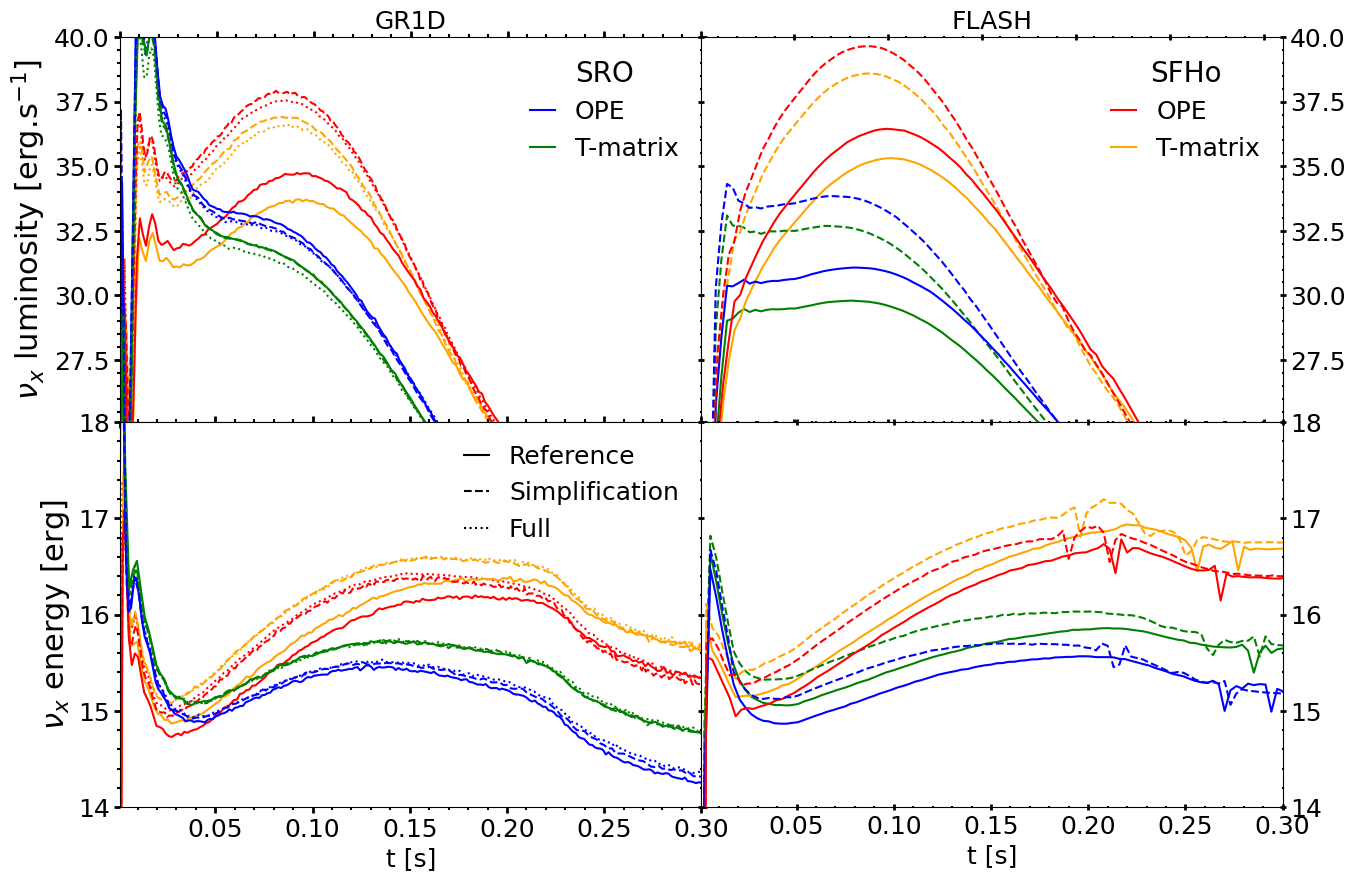

In [34]:
#### tbounce_SRO=0.299

col=['orange','orange','r','r']
ticks=['-','--','-','--']


factor=0.25

fig,ax = plt.subplots(2,2,figsize=(15,10))
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]

for i in range(len(GR1D_lum.keys())):
    name=list(GR1D_shock.keys())[i]
    tau=GR1D_lum[list(GR1D_lum.keys())[i]][3]
    x=GR1D_lum[list(GR1D_lum.keys())[i]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(GR1D_lum[list(GR1D_lum.keys())[i]][0].min(),GR1D_lum[list(GR1D_lum.keys())[i]][0].max(),500)
    tau_new= f(time)
    ax1.plot(time-globals()['tb'+name],tau_new/4e51,ls=globals()['ticks'+name],color=globals()['color'+name])

    tau=GR1D_energ[list(GR1D_energ.keys())[i]][3]
    x=GR1D_energ[list(GR1D_energ.keys())[i]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(GR1D_energ[list(GR1D_energ.keys())[i]][0].min(),GR1D_energ[list(GR1D_energ.keys())[i]][0].max(),500)
    tau_new= f(time)
    ax3.plot(time-globals()['tb'+name],tau_new,ls=globals()['ticks'+name],color=globals()['color'+name])

for i in range(len(list_file)):
    name = list_file[i][:-4]
    tau=globals()[list_file[i][:-4]][7]
    x=globals()[list_file[i][:-4]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(globals()[list_file[i][:-4]][0].min(),globals()[list_file[i][:-4]][0].max(),500)
    tau_new= f(time)
    ax2.plot(time-globals()['tb'+name],tau_new*factor,ls=globals()['ticks'+name],color=globals()['color'+name])
    tau=globals()[list_file[i][:-4]][10]
    x=globals()[list_file[i][:-4]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(globals()[list_file[i][:-4]][0].min(),globals()[list_file[i][:-4]][0].max(),500)
    tau_new= f(time)
    ax4.plot(time-globals()['tb'+name],tau_new,ls=globals()['ticks'+name],color=globals()['color'+name])

    
    

ax1.set_xlim([0,0.3])
ax3.set_xlim([0.001,0.3])
ax1.set_ylim([25.1,40])
ax3.set_ylim([14,18])
ax2.set_xlim([0.001,0.31])
ax4.set_xlim([0.001,0.3])
ax2.set_ylim([25.1,40])
ax4.set_ylim([14,18])


black_line1, = plt.plot([], [], color='b', linestyle='-')
black_line2, = plt.plot([], [], color='g', linestyle='-')
ax1.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],title='SRO',title_fontsize=20,fontsize=18,handlelength=1,frameon=False,loc= "upper right")
black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
ax2.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],title='SFHo',title_fontsize=20,fontsize=18,handlelength=1,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
black_line3, = plt.plot([], [], color='k', linestyle=':')
ax3.legend([black_line1,black_line2,black_line3],[r"Reference",r"Simplification","Full"],fontsize=18,handlelength=1,frameon=False,loc= "upper right")



for i in range(4) : 
    i=i+1
    print(i%2)
    if (i%2 == 1):
        test=globals()['ax'+str(i)]
        test.xaxis.set_minor_locator(AutoMinorLocator())
        test.yaxis.set_minor_locator(AutoMinorLocator())

        test.yaxis.set_ticks_position('both')
        test.xaxis.set_ticks_position('both')

        test.tick_params(axis='both', which='major', labelsize=18,width=2,length=4)
        test.tick_params(axis='both', which='minor', labelsize=18,width=1.5,length=2)
    else: 
        test=globals()['ax'+str(i)]
        test.xaxis.set_minor_locator(AutoMinorLocator())
        test.yaxis.set_minor_locator(AutoMinorLocator())

        test.yaxis.set_ticks_position('both')
        test.xaxis.set_ticks_position('both')

        test.tick_params(axis='both', which='major',labelright=True,labelleft=False, labelsize=18,width=2,length=4,direction='inout')
        test.tick_params(axis='both', which='minor', labelsize=18,width=1.5,length=2,direction='inout')
        
        
ax3.set_xlabel(r't [s]',fontsize=18)
ax4.set_xlabel(r't [s]',fontsize=18)
ax1.set_ylabel(r'$\nu_x$ luminosity [erg.s$^{-1}$]',fontsize=22)
ax3.set_ylabel(r'$\nu_x$ energy [erg]',fontsize=22)
ax1.set_title("GR1D",fontsize=18)
ax2.set_title("FLASH",fontsize=18)



plt.subplots_adjust(wspace=0,hspace=0)
ax1.set_xticklabels([])    
ax2.set_xticklabels([])    

1
0
1
0


[Text(0.0, 0, ''),
 Text(0.2, 0, ''),
 Text(0.4, 0, ''),
 Text(0.6000000000000001, 0, '')]

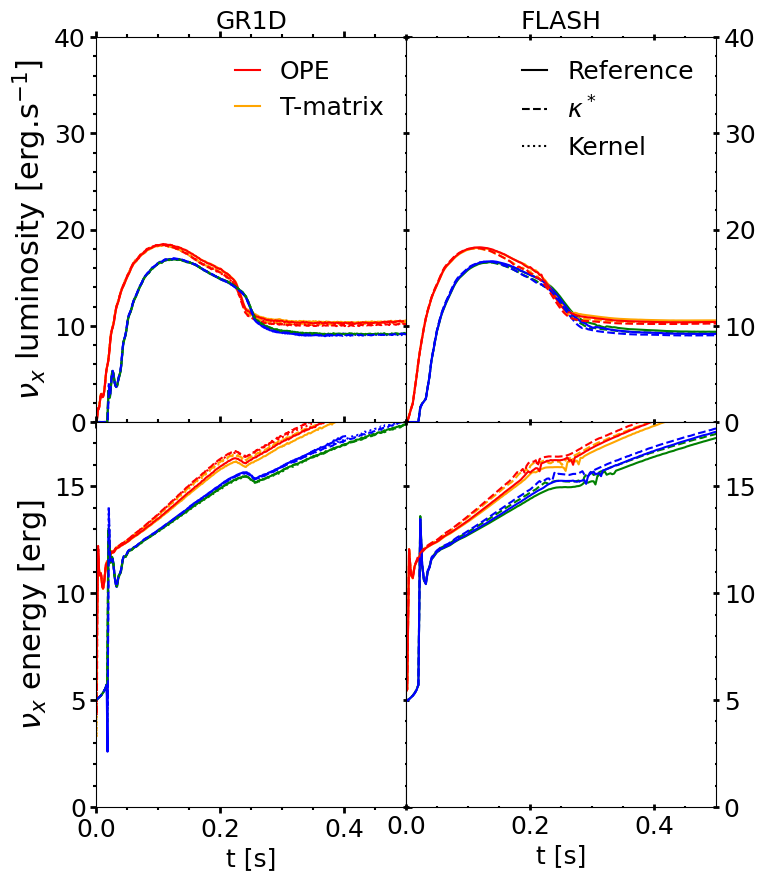

In [13]:
tbounce_SRO=0.299

col=['orange','orange','r','r']
ticks=['-','--','-','--']


factor=0.25

fig,ax = plt.subplots(2,2,figsize=(8,10))
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]

for i in range(len(GR1D_lum.keys())):
    name=list(GR1D_shock.keys())[i]
    tau=GR1D_lum[list(GR1D_lum.keys())[i]][2]
    x=GR1D_lum[list(GR1D_lum.keys())[i]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(GR1D_lum[list(GR1D_lum.keys())[i]][0].min(),GR1D_lum[list(GR1D_lum.keys())[i]][0].max(),500)
    tau_new= f(time)
    ax1.plot(time-tbounce_SRO,tau_new/4e51,ls=globals()['ticks'+name],color=globals()['color'+name])

    tau=GR1D_energ[list(GR1D_energ.keys())[i]][2]
    x=GR1D_energ[list(GR1D_energ.keys())[i]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(GR1D_energ[list(GR1D_energ.keys())[i]][0].min(),GR1D_energ[list(GR1D_energ.keys())[i]][0].max(),500)
    tau_new= f(time)
    ax3.plot(time-tbounce_SRO,tau_new,ls=globals()['ticks'+name],color=globals()['color'+name])

for i in range(len(list_file)):
    name = list_file[i][:-4]
    tau=globals()[list_file[i][:-4]][6]
    x=globals()[list_file[i][:-4]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(globals()[list_file[i][:-4]][0].min(),globals()[list_file[i][:-4]][0].max(),500)
    tau_new= f(time)
    ax2.plot(time-tbounce_SRO,tau_new*factor,ls=globals()['ticks'+name],color=globals()['color'+name])
    tau=globals()[list_file[i][:-4]][9]
    x=globals()[list_file[i][:-4]][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(globals()[list_file[i][:-4]][0].min(),globals()[list_file[i][:-4]][0].max(),500)
    tau_new= f(time)
    ax4.plot(time-tbounce_SRO,tau_new,ls=globals()['ticks'+name],color=globals()['color'+name])

    
    

ax1.set_xlim([0,0.5])
ax3.set_xlim([0,0.5])
ax1.set_ylim([0,40])
ax3.set_ylim([0,18])
ax2.set_xlim([0,0.5])
ax4.set_xlim([0,0.5])
ax2.set_ylim([0,40])
ax4.set_ylim([0,18])


black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
ax1.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=18,handlelength=1,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
black_line3, = plt.plot([], [], color='k', linestyle=':')
ax2.legend([black_line1,black_line2,black_line3],[r"Reference",r"$\kappa^*$","Kernel"],fontsize=18,handlelength=1,frameon=False,loc= "upper right")



for i in range(4) : 
    i=i+1
    print(i%2)
    if (i%2 == 1):
        test=globals()['ax'+str(i)]
        test.xaxis.set_minor_locator(AutoMinorLocator())
        test.yaxis.set_minor_locator(AutoMinorLocator())

        test.yaxis.set_ticks_position('both')
        test.xaxis.set_ticks_position('both')

        test.tick_params(axis='both', which='major', labelsize=18,width=2,length=4)
        test.tick_params(axis='both', which='minor', labelsize=18,width=1.5,length=2)
    else: 
        test=globals()['ax'+str(i)]
        test.xaxis.set_minor_locator(AutoMinorLocator())
        test.yaxis.set_minor_locator(AutoMinorLocator())

        test.yaxis.set_ticks_position('both')
        test.xaxis.set_ticks_position('both')

        test.tick_params(axis='both', which='major',labelright=True,labelleft=False, labelsize=18,width=2,length=4,direction='inout')
        test.tick_params(axis='both', which='minor', labelsize=18,width=1.5,length=2,direction='inout')
        
        
ax3.set_xlabel(r't [s]',fontsize=18)
ax4.set_xlabel(r't [s]',fontsize=18)
ax1.set_ylabel(r'$\nu_x$ luminosity [erg.s$^{-1}$]',fontsize=22)
ax3.set_ylabel(r'$\nu_x$ energy [erg]',fontsize=22)
ax1.set_title("GR1D",fontsize=18)
ax2.set_title("FLASH",fontsize=18)



plt.subplots_adjust(wspace=0,hspace=0)
ax1.set_xticklabels([])    
ax2.set_xticklabels([])    